# Portfolio with the Maximum Sortino Ratio for the IT Sector

In [1]:
from pandas_datareader import data
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Establishing Dates
start = "2017-01-01"
end = "2021-12-31"

# Establishing Assets
assets = ['INFY.NS', 'TCS.NS', 'HCLTECH.NS', 'WIPRO.NS', 'TECHM.NS', 
         'LTI.NS', 'MINDTREE.NS', 'MPHASIS.NS', 'COFORGE.NS', 'LTTS.NS']

#252 trading days in a year
N = 252

#1% risk free rate
rf =0.02

# Creating an empty dataframe
df_prices = pd.DataFrame()

# Getting the "Adj Close" data from Yahoo Finance by defining a function
# This function lists the price data as daily percent change 
def YahooData(dataframe, assets_list, start_date, end_date):
    for i in assets_list:
        dataframe[i] = data.DataReader(i, data_source = "yahoo", start=start_date, end=end_date)['Adj Close']
    return dataframe

# Running the function that we just made and saving the results to the DataFrame
df = YahooData(df_prices, assets, start, end)

In [3]:
df.to_csv("IT.csv")

In [2]:
df = pd.read_csv("IT.csv", index_col=0)

In [3]:
df.head()

INFY.NS       TCS.NS  HCLTECH.NS    WIPRO.NS    TECHM.NS  \
Date                                                                      
2017-01-02  437.759674  1070.290405  380.163605  173.611465  422.506134   
2017-01-03  434.589478  1073.417480  383.215027  171.936279  425.579681   
2017-01-04  436.294800  1078.516846  393.218109  175.102570  433.415100   
2017-01-05  435.595245  1058.074707  387.574188  176.869797  422.592743   
2017-01-06  425.144226  1034.052368  373.693695  173.022385  406.705414   

                LTI.NS  MINDTREE.NS  MPHASIS.NS  COFORGE.NS     LTTS.NS  
Date                                                                     
2017-01-02  629.474304   459.449005  492.455780  399.368866  758.917236  
2017-01-03  629.289429   451.623962  474.617371  403.630859  763.488037  
2017-01-04  645.851990   468.074249  471.835602  409.204346  761.226257  
2017-01-05  639.930176   465.673309  475.323822  403.303009  763.205261  
2017-01-06  629.243042   444.777252  465.521545  395.902954  757.692261

In [4]:
# Calculating Log Return
df = np.log(df/df.shift(1))

# Dropping the first row because it's N/A
df = df.dropna()

# Viewing df head
df

INFY.NS    TCS.NS  HCLTECH.NS  WIPRO.NS  TECHM.NS    LTI.NS  \
Date                                                                       
2017-01-03 -0.007268  0.002917    0.007995 -0.009696  0.007248 -0.000294   
2017-01-04  0.003916  0.004739    0.025768  0.018248  0.018244  0.025979   
2017-01-05 -0.001605 -0.019136   -0.014457  0.010042 -0.025287 -0.009211   
2017-01-06 -0.024285 -0.022966   -0.036471 -0.021993 -0.038320 -0.016841   
2017-01-09 -0.001956  0.009727    0.028924  0.004353  0.007846  0.001029   
...              ...       ...         ...       ...       ...       ...   
2021-12-27  0.001421  0.006841    0.001579  0.001645  0.034887  0.002049   
2021-12-28  0.011641  0.002823    0.013093  0.008327  0.011751  0.012551   
2021-12-29 -0.001298 -0.003202    0.006212 -0.002484 -0.010716 -0.001218   
2021-12-30  0.003864  0.010514    0.019280  0.014671  0.007305  0.004040   
2021-12-31 -0.002698  0.001231    0.001555  0.001749 -0.005236  0.005402   

            MINDTREE.NS  MPHASIS.NS  COFORGE.NS   LTTS.NS  
Date                                                       
2017-01-03    -0.017178   -0.036896    0.010615  0.006005  
2017-01-04     0.035777   -0.005878    0.013714 -0.002967  
2017-01-05    -0.005143    0.007366   -0.014526  0.002596  
2017-01-06    -0.045911   -0.020838   -0.018519 -0.007250  
2017-01-09    -0.009441    0.005109    0.017706  0.017324  
...                 ...         ...         ...       ...  
2021-12-27     0.002928    0.003830   -0.004874  0.024395  
2021-12-28     0.007481    0.030337    0.006662  0.000365  
2021-12-29    -0.004196   -0.005964   -0.001168  0.014149  
2021-12-30     0.017851    0.010683    0.036764  0.003280  
2021-12-31     0.009755    0.015158    0.005055  0.004556  

[1235 rows x 10 columns]

In [5]:
assets = ['INFY.NS', 'TCS.NS', 'HCLTECH.NS', 'WIPRO.NS', 'TECHM.NS', 
         'LTI.NS', 'MINDTREE.NS', 'MPHASIS.NS', 'COFORGE.NS', 'LTTS.NS']

# Creating 10000 random simulations of each portfolio weight configuration
num_runs = 10000 # number of rows/iterations

# Creating a Matrix with 10000 rows, with each row representing a random portfolio:
    #first 3 columns are Mean Returns, Standard Deviation, and Sortino Ratio
    # remaining columns are each assets random weight within that random portfolio
result = np.zeros((num_runs,(len(assets)+5)))
result

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
df.shape

(1235, 10)

In [7]:
df.head()

INFY.NS    TCS.NS  HCLTECH.NS  WIPRO.NS  TECHM.NS    LTI.NS  \
Date                                                                       
2017-01-03 -0.007268  0.002917    0.007995 -0.009696  0.007248 -0.000294   
2017-01-04  0.003916  0.004739    0.025768  0.018248  0.018244  0.025979   
2017-01-05 -0.001605 -0.019136   -0.014457  0.010042 -0.025287 -0.009211   
2017-01-06 -0.024285 -0.022966   -0.036471 -0.021993 -0.038320 -0.016841   
2017-01-09 -0.001956  0.009727    0.028924  0.004353  0.007846  0.001029   

            MINDTREE.NS  MPHASIS.NS  COFORGE.NS   LTTS.NS  
Date                                                       
2017-01-03    -0.017178   -0.036896    0.010615  0.006005  
2017-01-04     0.035777   -0.005878    0.013714 -0.002967  
2017-01-05    -0.005143    0.007366   -0.014526  0.002596  
2017-01-06    -0.045911   -0.020838   -0.018519 -0.007250  
2017-01-09    -0.009441    0.005109    0.017706  0.017324

In [8]:
df_training = df[0:987]
df_training.columns

Index(['INFY.NS', 'TCS.NS', 'HCLTECH.NS', 'WIPRO.NS', 'TECHM.NS', 'LTI.NS',
       'MINDTREE.NS', 'MPHASIS.NS', 'COFORGE.NS', 'LTTS.NS'],
      dtype='object')

In [9]:
df_training.shape

(987, 10)

In [10]:
df_training.tail()

INFY.NS    TCS.NS  HCLTECH.NS  WIPRO.NS  TECHM.NS    LTI.NS  \
Date                                                                       
2020-12-24 -0.013660  0.000206   -0.003529 -0.008727 -0.000950 -0.013520   
2020-12-28  0.003432  0.006868    0.002661  0.001830 -0.000158  0.004170   
2020-12-29  0.008030  0.000376    0.015180  0.005469  0.019397 -0.008496   
2020-12-30 -0.002803 -0.007261    0.005116 -0.001560  0.018062  0.014083   
2020-12-31  0.007192 -0.016130    0.005777  0.004801 -0.010274 -0.000451   

            MINDTREE.NS  MPHASIS.NS  COFORGE.NS   LTTS.NS  
Date                                                       
2020-12-24     0.001002   -0.013482    0.007702  0.012640  
2020-12-28     0.006924    0.003852    0.014354  0.017034  
2020-12-29     0.008017   -0.000865   -0.003872 -0.007521  
2020-12-30     0.005044    0.019813    0.005247 -0.013780  
2020-12-31     0.018479   -0.032236    0.003907  0.000406

In [11]:
df_test= df[987:]
df_test.head()

INFY.NS    TCS.NS  HCLTECH.NS  WIPRO.NS  TECHM.NS    LTI.NS  \
Date                                                                       
2021-01-01  0.003696  0.022622    0.004587  0.004778  0.004869  0.010817   
2021-01-04  0.021816  0.037272    0.030973  0.021161  0.024245  0.038721   
2021-01-05  0.004299  0.017465    0.011107  0.024668  0.001894  0.071255   
2021-01-06 -0.009084 -0.013508   -0.013353  0.000246 -0.006697 -0.042659   
2021-01-07 -0.015683 -0.006147   -0.016128  0.000861 -0.002410 -0.018879   

            MINDTREE.NS  MPHASIS.NS  COFORGE.NS   LTTS.NS  
Date                                                       
2021-01-01    -0.000663   -0.006547    0.006301  0.029439  
2021-01-04     0.017889   -0.006920    0.041835  0.017342  
2021-01-05     0.014458    0.040186    0.015382  0.021128  
2021-01-06    -0.011119    0.021331   -0.028503 -0.004663  
2021-01-07    -0.007551    0.028824   -0.021923 -0.040448

In [12]:
df_test.shape

(248, 10)

In [15]:
#df = df.copy()
for i in range(num_runs):
    
    # randomized weights
    weights = np.array(np.random.random(len(assets))) 
    #Rebalance w/ constraints (SUM of all weights CANNOT BE > 1)
    weights = weights/np.sum(weights)
    
    # daily return of the portfolio based on a given set of weights
    df_training['portfolio_ret'] = df_training.iloc[:,0]*weights[0]+df_training.iloc[:,1]*weights[1]+df_training.iloc[:,2]*weights[2]
    
    # Calculating Mean
    E = df_training['portfolio_ret'].mean()
    # Annualizing Mean
    E_AN = E * N
    
    # Calculating Downside Standard Deviation
    mean = E * N -rf
    std_neg = df_training['portfolio_ret'][df_training['portfolio_ret']<0].std()*np.sqrt(N)
    
    
    # Calculating Upside Standard Deviation
    std_pos = df_training['portfolio_ret'][df_training['portfolio_ret']>=0].std()*np.sqrt(N)
    
    # Calculating Volatility Skewness
    VS = std_pos/std_neg
    
    # Sortino
    Sortino = mean/std_neg
   
    # Populating the 'result' array with the required values: Mean, SD, Sharpe followed by the weights                   
    result[i,0] = E_AN
    result[i,1] = std_neg
    result[i,2] = std_pos
    result[i,3] = VS
    result[i,4] = Sortino
    
    for j in range(len(assets)):
        result[i,j+5]= weights[j]

In [16]:
# Converting 'result' into a DataFrame

columns = ['Mean','Downside SD', 'Upside SD', 'Volatility Skewness', 'Sortino'] + assets

result = pd.DataFrame(result,columns=columns)
result

Mean  Downside SD  Upside SD  Volatility Skewness   Sortino  \
0     0.081633     0.065492   0.060036             0.916687  0.941070   
1     0.114542     0.084900   0.077671             0.914849  1.113566   
2     0.095171     0.073916   0.065128             0.881107  1.016973   
3     0.057944     0.042226   0.039069             0.925225  0.898595   
4     0.076303     0.055369   0.050921             0.919665  1.016872   
...        ...          ...        ...                  ...       ...   
9995  0.075546     0.055769   0.051022             0.914870  0.995999   
9996  0.090208     0.066480   0.062051             0.933371  1.056076   
9997  0.081613     0.059391   0.053982             0.908933  1.037415   
9998  0.070321     0.052188   0.049446             0.947454  0.964235   
9999  0.064996     0.052464   0.050501             0.962585  0.857660   

       INFY.NS    TCS.NS  HCLTECH.NS  WIPRO.NS  TECHM.NS    LTI.NS  \
0     0.169577  0.004442    0.160139  0.144421  0.088223  0.082897   
1     0.174155  0.141306    0.150115  0.069541  0.001874  0.014818   
2     0.226360  0.092006    0.056349  0.039139  0.061254  0.022148   
3     0.061022  0.101789    0.074309  0.096752  0.031309  0.098134   
4     0.102508  0.195182    0.003736  0.085452  0.209695  0.006697   
...        ...       ...         ...       ...       ...       ...   
9995  0.108513  0.102246    0.096469  0.131501  0.115543  0.008535   
9996  0.097299  0.119779    0.155937  0.117871  0.071028  0.031446   
9997  0.118393  0.161300    0.046363  0.045137  0.036476  0.161038   
9998  0.038938  0.113038    0.143380  0.181941  0.136006  0.124553   
9999  0.057048  0.018961    0.202602  0.180490  0.045464  0.076736   

      MINDTREE.NS  MPHASIS.NS  COFORGE.NS   LTTS.NS  
0        0.065601    0.049345    0.169517  0.065838  
1        0.127232    0.012822    0.131889  0.176250  
2        0.086014    0.167488    0.054647  0.194595  
3        0.152348    0.133690    0.144783  0.105865  
4        0.113733    0.043923    0.188270  0.050805  
...           ...         ...         ...       ...  
9995     0.131787    0.129694    0.165039  0.010674  
9996     0.018184    0.137578    0.086934  0.163944  
9997     0.106141    0.037618    0.122385  0.165149  
9998     0.120899    0.049151    0.066752  0.025342  
9999     0.076279    0.070334    0.096301  0.175785  

[10000 rows x 15 columns]

In [17]:
result.head()

Mean  Downside SD  Upside SD  Volatility Skewness   Sortino   INFY.NS  \
0  0.081633     0.065492   0.060036             0.916687  0.941070  0.169577   
1  0.114542     0.084900   0.077671             0.914849  1.113566  0.174155   
2  0.095171     0.073916   0.065128             0.881107  1.016973  0.226360   
3  0.057944     0.042226   0.039069             0.925225  0.898595  0.061022   
4  0.076303     0.055369   0.050921             0.919665  1.016872  0.102508   

     TCS.NS  HCLTECH.NS  WIPRO.NS  TECHM.NS    LTI.NS  MINDTREE.NS  \
0  0.004442    0.160139  0.144421  0.088223  0.082897     0.065601   
1  0.141306    0.150115  0.069541  0.001874  0.014818     0.127232   
2  0.092006    0.056349  0.039139  0.061254  0.022148     0.086014   
3  0.101789    0.074309  0.096752  0.031309  0.098134     0.152348   
4  0.195182    0.003736  0.085452  0.209695  0.006697     0.113733   

   MPHASIS.NS  COFORGE.NS   LTTS.NS  
0    0.049345    0.169517  0.065838  
1    0.012822    0.131889  0.176250  
2    0.167488    0.054647  0.194595  
3    0.133690    0.144783  0.105865  
4    0.043923    0.188270  0.050805

In [13]:
df.head()

INFY.NS    TCS.NS  HCLTECH.NS  WIPRO.NS  TECHM.NS    LTI.NS  \
Date                                                                       
2017-01-03 -0.007268  0.002917    0.007995 -0.009696  0.007248 -0.000294   
2017-01-04  0.003916  0.004739    0.025768  0.018248  0.018244  0.025979   
2017-01-05 -0.001605 -0.019136   -0.014457  0.010042 -0.025287 -0.009211   
2017-01-06 -0.024285 -0.022966   -0.036471 -0.021993 -0.038320 -0.016841   
2017-01-09 -0.001956  0.009727    0.028924  0.004353  0.007846  0.001029   

            MINDTREE.NS  MPHASIS.NS  COFORGE.NS   LTTS.NS  
Date                                                       
2017-01-03    -0.017178   -0.036896    0.010615  0.006005  
2017-01-04     0.035777   -0.005878    0.013714 -0.002967  
2017-01-05    -0.005143    0.007366   -0.014526  0.002596  
2017-01-06    -0.045911   -0.020838   -0.018519 -0.007250  
2017-01-09    -0.009441    0.005109    0.017706  0.017324

In [14]:
df_training = df[0:987]
df_training.columns

Index(['INFY.NS', 'TCS.NS', 'HCLTECH.NS', 'WIPRO.NS', 'TECHM.NS', 'LTI.NS',
       'MINDTREE.NS', 'MPHASIS.NS', 'COFORGE.NS', 'LTTS.NS'],
      dtype='object')

In [15]:
df_training.shape

(987, 10)

In [16]:
df_test= df[987:]
df_test.head()

INFY.NS    TCS.NS  HCLTECH.NS  WIPRO.NS  TECHM.NS    LTI.NS  \
Date                                                                       
2021-01-01  0.003696  0.022622    0.004587  0.004778  0.004869  0.010817   
2021-01-04  0.021816  0.037272    0.030973  0.021161  0.024245  0.038721   
2021-01-05  0.004299  0.017465    0.011107  0.024668  0.001894  0.071255   
2021-01-06 -0.009084 -0.013508   -0.013353  0.000246 -0.006697 -0.042659   
2021-01-07 -0.015683 -0.006147   -0.016128  0.000861 -0.002410 -0.018879   

            MINDTREE.NS  MPHASIS.NS  COFORGE.NS   LTTS.NS  
Date                                                       
2021-01-01    -0.000663   -0.006547    0.006301  0.029439  
2021-01-04     0.017889   -0.006920    0.041835  0.017342  
2021-01-05     0.014458    0.040186    0.015382  0.021128  
2021-01-06    -0.011119    0.021331   -0.028503 -0.004663  
2021-01-07    -0.007551    0.028824   -0.021923 -0.040448

In [17]:
df_test.shape

(248, 10)

In [23]:
Max_Sortino = result.iloc[result['Sortino'].idxmax()]
Max_Sortino

Mean                   0.163922
Downside SD            0.120240
Upside SD              0.112711
Volatility Skewness    0.937384
Sortino                1.196955
INFY.NS                0.140108
TCS.NS                 0.260386
HCLTECH.NS             0.279311
WIPRO.NS               0.002137
TECHM.NS               0.000318
LTI.NS                 0.164018
MINDTREE.NS            0.003021
MPHASIS.NS             0.058561
COFORGE.NS             0.084534
LTTS.NS                0.007606
Name: 2714, dtype: float64

In [24]:
Min_DSD = result.iloc[result['Downside SD'].idxmin()]
Min_DSD

Mean                    0.000619
Downside SD             0.000494
Upside SD               0.000441
Volatility Skewness     0.891924
Sortino               -39.212451
INFY.NS                 0.001478
TCS.NS                  0.000210
HCLTECH.NS              0.000791
WIPRO.NS                0.107797
TECHM.NS                0.163871
LTI.NS                  0.249418
MINDTREE.NS             0.184353
MPHASIS.NS              0.002663
COFORGE.NS              0.094710
LTTS.NS                 0.194710
Name: 8906, dtype: float64

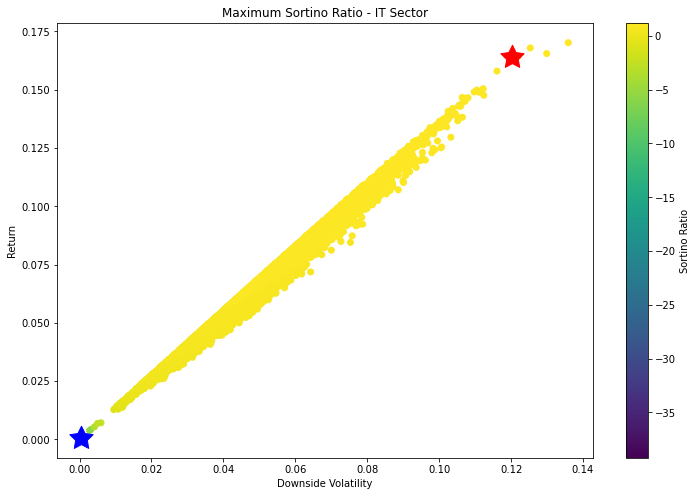

In [25]:
plt.figure(figsize=(12,8))
plt.scatter(x=result['Downside SD'],y=result['Mean'],c=result['Sortino'],cmap='viridis')
plt.colorbar(label='Sortino Ratio')
plt.xlabel('Downside Volatility')
plt.ylabel('Return')

plt.title('Maximum Sortino Ratio - IT Sector')
#Plot a red star to highlight position of the portfolio with highest Sortino Ratio
plt.scatter(Max_Sortino[1],Max_Sortino[0],marker=(5,1,0),color='r',s=600)
plt.scatter(Min_DSD[1],Min_DSD[0],marker=(5,1,0),color='b',s=600)

plt.show()

In [18]:
# Portfolio with the maximum Sharpe Ratio
w_raw = [0.0500, 0.0971, 0.0069, 0.0917, 0.0430, 0.2877, 0.0466, 0.1364, 0.1919, 0.0488]
#w_eigen = [i * 100 for i in w_raw]
print(w_raw)

w_1 = pd.DataFrame(w_raw, index = ['INFY','TCS','HCLTECH','WIPRO','TECHM',
          'LTI', 'MINDTREE', 'MPHASIS', 'COFORGE','LTTS'])
w_1.columns = ['weights']
w_1

[0.05, 0.0971, 0.0069, 0.0917, 0.043, 0.2877, 0.0466, 0.1364, 0.1919, 0.0488]


weights
INFY       0.0500
TCS        0.0971
HCLTECH    0.0069
WIPRO      0.0917
TECHM      0.0430
LTI        0.2877
MINDTREE   0.0466
MPHASIS    0.1364
COFORGE    0.1919
LTTS       0.0488

In [19]:
# Portfolio with the maximum Sortino Ratio
w_raw = [0.1401, 0.2604, 0.2793, 0.0021, 0.0003, 0.1640, 0.0030, 0.0586, 0.0845, 0.0076]
#w_eigen = [i * 100 for i in w_raw]
# print(w_raw)

w_2 = pd.DataFrame(w_raw, index = ['INFY','TCS','HCLTECH','WIPRO','TECHM',
          'LTI', 'MINDTREE', 'MPHASIS', 'COFORGE','LTTS'])
w_2.columns = ['weights']
w_2

weights
INFY       0.1401
TCS        0.2604
HCLTECH    0.2793
WIPRO      0.0021
TECHM      0.0003
LTI        0.1640
MINDTREE   0.0030
MPHASIS    0.0586
COFORGE    0.0845
LTTS       0.0076

In [20]:
# Portfolio with the maximum Calmar Ratio
w_raw = [0.0433, 0.2750, 0.0142, 0.0428, 0.0118, 0.1709, 0.1669, 0.0099, 0.1191, 0.1461]
#w_eigen = [i * 100 for i in w_raw]
# print(w_raw)

w_3 = pd.DataFrame(w_raw, index = ['INFY','TCS','HCLTECH','WIPRO','TECHM',
          'LTI', 'MINDTREE', 'MPHASIS', 'COFORGE','LTTS'])
w_3.columns = ['weights']
w_3

weights
INFY       0.0433
TCS        0.2750
HCLTECH    0.0142
WIPRO      0.0428
TECHM      0.0118
LTI        0.1709
MINDTREE   0.1669
MPHASIS    0.0099
COFORGE    0.1191
LTTS       0.1461

In [21]:
frames = [w_1, w_2, w_3]
  
result_1 = pd.concat(frames,axis=1)
#result.rename(columns={"weights": "HRP", "weights": "HERC", "weights": "EIGEN"}, inplace=True)
df_port = result_1.set_axis(['Sharpe Ratio', 'Sortino Ratio', 'Calmar Ratio'], axis=1, inplace=False)
#df3 =df3/100
display(df_port)

Sharpe Ratio  Sortino Ratio  Calmar Ratio
INFY            0.0500         0.1401        0.0433
TCS             0.0971         0.2604        0.2750
HCLTECH         0.0069         0.2793        0.0142
WIPRO           0.0917         0.0021        0.0428
TECHM           0.0430         0.0003        0.0118
LTI             0.2877         0.1640        0.1709
MINDTREE        0.0466         0.0030        0.1669
MPHASIS         0.1364         0.0586        0.0099
COFORGE         0.1919         0.0845        0.1191
LTTS            0.0488         0.0076        0.1461

Text(0.5, 1.0, 'Portfolio with Max Calmar Ratio')

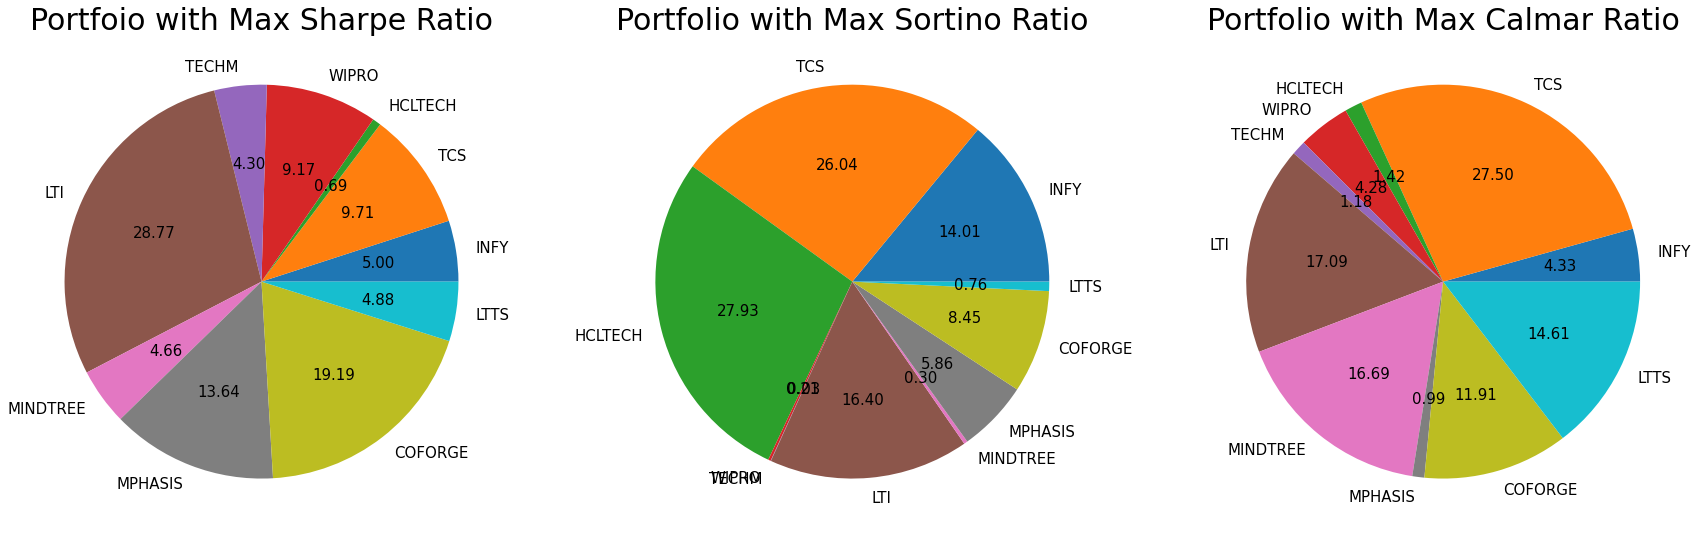

In [31]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(30,20))
ax1.pie(df_port.iloc[:,0], labels= df_port.index, autopct='%.2f', textprops={'fontsize': 15});
ax1.set_title('Portfoio with Max Sharpe Ratio',fontsize = 30)
ax2.pie(df_port.iloc[:,1], labels=df_port.index, autopct='%.2f', textprops={'fontsize': 15});
ax2.set_title('Portfolio with Max Sortino Ratio',fontsize = 30)
ax3.pie(df_port.iloc[:,2], labels=df_port.index, autopct='%.2f', textprops={'fontsize': 15});
ax3.set_title("Portfolio with Max Calmar Ratio", fontsize = 30)

#portfolios.plot.pie(subplots=True, figsize=(20, 10),legend = False);

In [32]:
df_training.shape

(987, 10)

In [33]:
Insample_Result=pd.DataFrame(np.dot(df_training, np.array(df_port)), \
                             columns=['Max Sharpe Ratio Portfolio', 'Max Sortino Ratio Portfolio', 'Max Calmar Ratio Portfolio'], index = df_training.index)
OutOfSample_Result=pd.DataFrame(np.dot(df_test,np.array(df_port)), \
                                columns=['Max Sharpe Ratio Portfolio', 'Max Sortino Ratio Portfolio', 'Max Calmar Ratio Portfolio'], index = df_test.index)

In [34]:
Insample_Result.head(20)

Max Sharpe Ratio Portfolio  Max Sortino Ratio Portfolio  \
Date                                                                  
2017-01-03                   -0.004190                     0.000637   
2017-01-04                    0.014118                     0.014183   
2017-01-05                   -0.006751                    -0.011534   
2017-01-06                   -0.021095                    -0.025367   
2017-01-09                    0.006579                     0.012417   
2017-01-10                    0.000937                     0.001501   
2017-01-11                   -0.001655                    -0.001569   
2017-01-12                    0.004852                     0.011468   
2017-01-13                   -0.007615                    -0.014895   
2017-01-16                   -0.001335                    -0.008464   
2017-01-17                   -0.004236                     0.002683   
2017-01-18                    0.015904                     0.010135   
2017-01-19                   -0.000627                     0.000684   
2017-01-20                   -0.004913                    -0.005263   
2017-01-23                   -0.003306                     0.006963   
2017-01-24                    0.003244                    -0.000363   
2017-01-25                    0.004884                     0.002988   
2017-01-27                    0.001715                     0.003252   
2017-01-30                   -0.002395                    -0.004462   
2017-01-31                   -0.025518                    -0.031729   

            Max Calmar Ratio Portfolio  
Date                                    
2017-01-03                   -0.000869  
2017-01-04                    0.014388  
2017-01-05                   -0.009116  
2017-01-06                   -0.023290  
2017-01-09                    0.006570  
2017-01-10                   -0.003342  
2017-01-11                    0.000454  
2017-01-12                    0.006400  
2017-01-13                   -0.012628  
2017-01-16                   -0.000897  
2017-01-17                   -0.000963  
2017-01-18                    0.014877  
2017-01-19                   -0.002996  
2017-01-20                   -0.004009  
2017-01-23                   -0.001067  
2017-01-24                    0.001988  
2017-01-25                    0.004597  
2017-01-27                    0.000208  
2017-01-30                   -0.006609  
2017-01-31                   -0.028313

<AxesSubplot:xlabel='Date', ylabel='Return'>

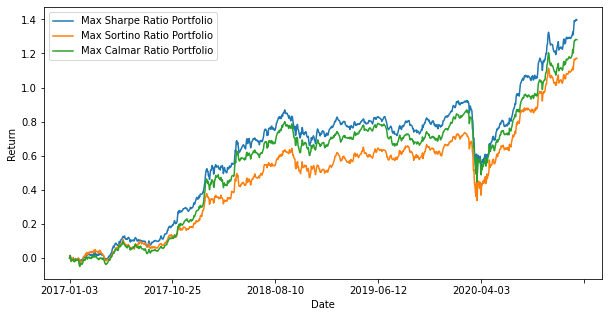

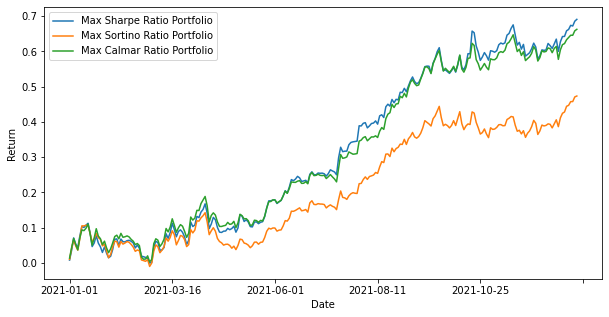

In [35]:
Insample_Result.cumsum().plot(figsize=(10, 5), ylabel = "Return")
OutOfSample_Result.cumsum().plot(figsize=(10, 5), ylabel = "Return")

In [36]:
ret_insample=Insample_Result.mean() * 252
ret_insample

Max Sharpe Ratio Portfolio     0.356492
Max Sortino Ratio Portfolio    0.298808
Max Calmar Ratio Portfolio     0.327005
dtype: float64

In [37]:
ret_out_of_sample = OutOfSample_Result.mean() * 252
ret_out_of_sample

Max Sharpe Ratio Portfolio     0.702298
Max Sortino Ratio Portfolio    0.481237
Max Calmar Ratio Portfolio     0.673565
dtype: float64